<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorios N°01

## Objetivos del laboratorio

* Reforzar conceptos básicos de regresión lineal.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

## Problema 1

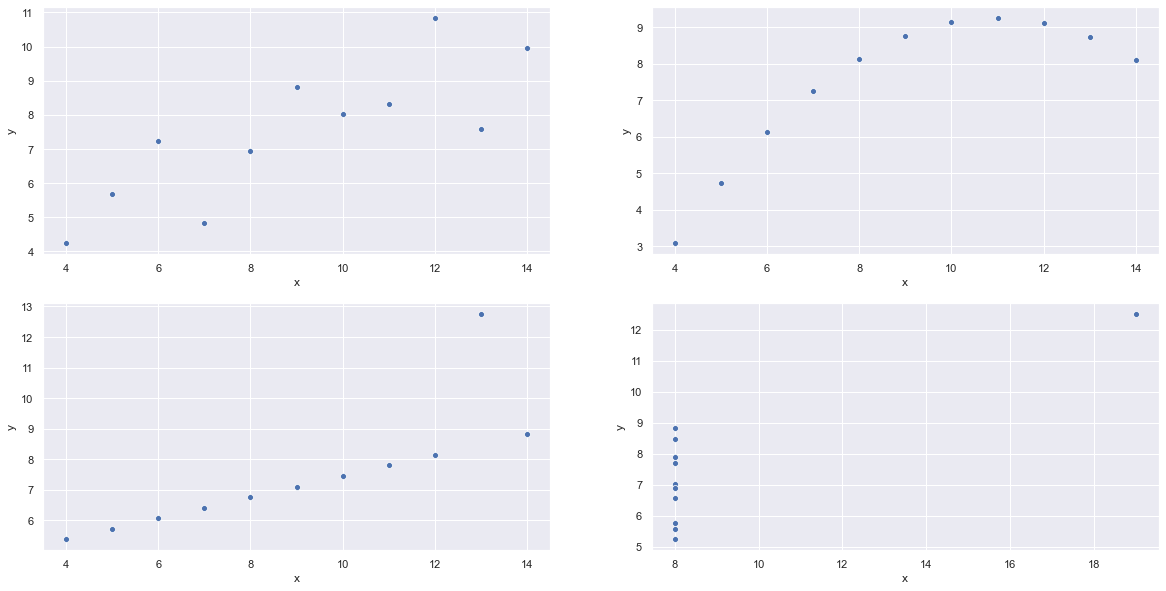

In [3]:
#Creación de todos los graficos del problema separados por grupo
plt.figure(figsize= (20,10))
g1 = plt.subplot(2,2,1)
g2 = plt.subplot(2,2,2)
g3 = plt.subplot(2,2,3)
g4 = plt.subplot(2,2,4)
sns.scatterplot(
    x='x',
    y='y',
    data=df[df['grupo'] == 'Grupo_1'],
    ax=g1
)
sns.scatterplot(
    x='x',
    y='y',
    data=df[df['grupo'] == 'Grupo_2'],
    ax=g2
)
sns.scatterplot(
    x='x',
    y='y',
    data=df[df['grupo'] == 'Grupo_3'],
    ax=g3
)
sns.scatterplot(
    x='x',
    y='y',
    data=df[df['grupo'] == 'Grupo_4'],
    ax=g4
)
plt.show()

En efecto los gráficos son muy distintos entre si:

Gráfico 1: Tiene una gran distribución entre todos sus datos

Gráfico 2: Tiene la forma de una curva cuadrática.

Gráfico 3: Se asemeja a una curva lineal pero con un punto muy disperso del resto.

Gráfico 4: Los datos estan pésimamente distribuidos, de hecho se esperaría tener un $r^2$ negativo

## Problema 2

In [4]:
df.groupby(['grupo']).describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
grupo                                                                     
Grupo_1  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
Grupo_2  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
Grupo_3  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
Grupo_4  11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
grupo                                              
Grupo_1  2.031568  4.26  6.315  7.58  8.57  10.84  
Grupo_2  2.031657  3.10  6.695  8.14  8.95   9.26  
Grupo_3  2.030424  5.39  6.250  7.11  7.98  12.74  
Grupo_4  2.030579  5.25  6.170  7.04  8.19  12.50

Basta notar que los datos son sumamente semejantes entre si, pero veremos que el comportamiento en sus gráficos es diferente.

## Problema 3

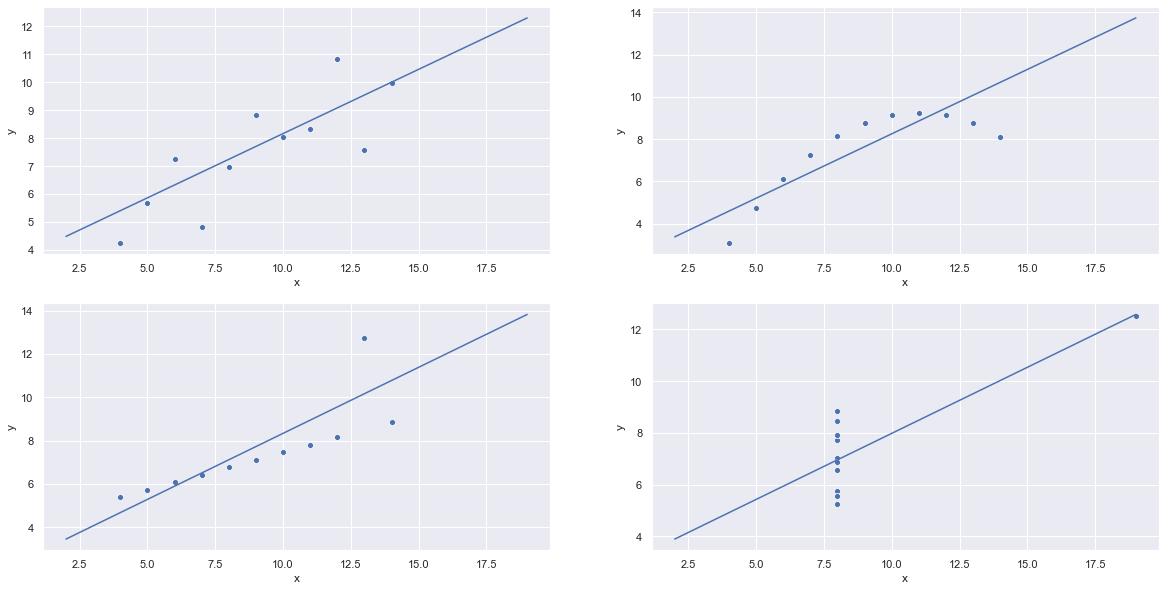

In [5]:
# importando el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model_rl1 = LinearRegression() # Creando el modelo.

grupo1 = df[df['grupo'] == 'Grupo_1']
grupo2 = df[df['grupo'] == 'Grupo_2']
grupo3 = df[df['grupo'] == 'Grupo_3']
grupo4 = df[df['grupo'] == 'Grupo_4']

############################################################
#Modelo 1

x1 = grupo1[['x']]
y1 = grupo1['y']

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.33, random_state=42)


model_rl1.fit(x1_train, y1_train) 

# Lista de coeficientes B para cada X

beta_01 = round(model_rl1.intercept_,2)
beta_11 = round(model_rl1.coef_[0],2)

x1_rango = np.arange(2,20,1)
y1_rango = [beta_01 + beta_11*x for x in x1_rango]
df_plot1 = pd.DataFrame({'x':x1_rango,
                        'y': y1_rango})
#############################################################
#Modelo 2

model_rl2 = LinearRegression() # Creando el modelo.

x2 = grupo2[['x']]
y2 = grupo2['y']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.33, random_state=42)

model_rl2.fit(x2_train, y2_train) 

# Lista de coeficientes B para cada X

beta_02 = round(model_rl2.intercept_,2)
beta_12 = round(model_rl2.coef_[0],2)

x1_rango = np.arange(2,20,1)
y2_rango = [beta_02 + beta_12*x for x in x1_rango]
df_plot2 = pd.DataFrame({'x':x1_rango,
                        'y': y2_rango})
############################################################
#Modelo 3

model_rl3 = LinearRegression() # Creando el modelo.

x3 = grupo3[['x']]
y3 = grupo3['y']

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.33, random_state=42)

model_rl3.fit(x3_train, y3_train) 

# Lista de coeficientes B para cada X

beta_03 = round(model_rl3.intercept_,2)
beta_13 = round(model_rl3.coef_[0],2)

x1_rango = np.arange(2,20,1)
y3_rango = [beta_03 + beta_13*x for x in x1_rango]
df_plot3 = pd.DataFrame({'x':x1_rango,
                        'y': y3_rango})
############################################################
#Modelo 4

model_rl4 = LinearRegression() # Creando el modelo.

x4 = grupo4[['x']]
y4 = grupo4['y']

x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.33, random_state=42)

model_rl4.fit(x4_train, y4_train) 

# Lista de coeficientes B para cada X

beta_04 = round(model_rl4.intercept_,2)
beta_14 = round(model_rl4.coef_[0],2)

x1_rango = np.arange(2,20,1)
y4_rango = [beta_04 + beta_14*x for x in x1_rango]
df_plot4 = pd.DataFrame({'x':x1_rango,
                        'y': y4_rango})
############################################################
#Sección de gráficos


plt.figure(figsize= (20,10))
g1 = plt.subplot(2,2,1)
g2 = plt.subplot(2,2,2)
g3 = plt.subplot(2,2,3)
g4 = plt.subplot(2,2,4)

#Grafico 1
sns.scatterplot(
    x='x',
    y='y',
    data=df[df['grupo'] == 'Grupo_1'],
    ax=g1
)
sns.lineplot(
    x='x',
    y='y',
    data=df_plot1,
    ax=g1
)



#Grafico 2
sns.scatterplot(
    x='x',
    y='y',
    data=df[df['grupo'] == 'Grupo_2'],
    ax=g2
)
sns.lineplot(
    x='x',
    y='y',
    data=df_plot2,
    ax=g2
)




#Grafico 3

sns.scatterplot(
    x='x',
    y='y',
    data=df[df['grupo'] == 'Grupo_3'],
    ax=g3
)
sns.lineplot(
    x='x',
    y='y',
    data=df_plot3,
    ax=g3
)




#Grafico 4
sns.scatterplot(
    x='x',
    y='y',
    data=df[df['grupo'] == 'Grupo_4'],
    ax=g4
)
sns.lineplot(
    x='x',
    y='y',
    data=df_plot4,
    ax=g4
)

plt.show()

En cada gráfico podemos notar que:

Gráfico 1: Al ser los datos muy disperso, la recta se encuentre entre medio de todos los datos

Gráfico 2: Aqui la recta no pasa por ningun punto debido a que sería mas conveniete tomar una curva cuadrática

Gráfico 3: Este caso es casi perfecto pero hay un únto aislado lo que arruina el hecho que la recta pase por todos los puntos

Gráfico 4: Es claro que con una recta no se podrá pasar por esos puntos.

## Problema 4

In [6]:
from metrics_regression import *
from sklearn.metrics import r2_score

# Grupo 1 
df_temp = pd.DataFrame(
    {
        'y':y1_test,
        'yhat': model_rl1.predict(x1_test)
        }
)

df1_metrics = summary_metrics(df_temp)
df1_metrics['r2'] =  round(r2_score(y1_test, model_rl1.predict(x1_test)),4)


#Grupo 2

df_temp = pd.DataFrame(
    {
        'y':y2_test,
        'yhat': model_rl2.predict(x2_test)
        }
)

df2_metrics = summary_metrics(df_temp)
df2_metrics['r2'] =  round(r2_score(y2_test, model_rl2.predict(x2_test)),4)


#Grupo 3

df_temp = pd.DataFrame(
    {
        'y':y3_test,
        'yhat': model_rl3.predict(x3_test)
        }
)

df3_metrics = summary_metrics(df_temp)
df3_metrics['r2'] =  round(r2_score(y3_test, model_rl3.predict(x3_test)),4)


#Grupo 4

df_temp = pd.DataFrame(
    {
        'y':y4_test,
        'yhat': model_rl4.predict(x4_test)
        }
)

df4_metrics = summary_metrics(df_temp)
df4_metrics['r2'] =  round(r2_score(y4_test, model_rl4.predict(x4_test)),4)

#Creación de la tabla

df_concatenado = pd.concat([df1_metrics, df2_metrics, df3_metrics, df4_metrics])

grupos = pd.Series(['Grupo_1','Grupo_2','Grupo_3', 'Grupo_4']) 
df_concatenado.set_index(keys=grupos)

,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
Grupo_1,0.5907,0.9878,0.9939,0.1165,0.1113,0.0829,0.0971,0.0990,0.7572
Grupo_2,1.1934,2.0670,1.4377,0.1569,0.1541,0.1633,0.1381,0.1484,0.2186
Grupo_3,0.8342,1.1773,1.0850,0.1067,0.1057,0.1173,0.0943,0.1005,0.1432
Grupo_4,0.3700,0.2736,0.5230,0.0496,0.0495,0.0521,0.0437,0.0514,-0.1234


Notemos que el Grupo 3 es aquel que tiene el menor $r^2$ lo que tiene sentido pues sus datos seasemejan a una recta, mientras que el Grupo 4 tiene un $r^2$ negativo ya que los datos estan sumamente mal distribuidos si pensamos en una recta.

## Problema 5

A continuación se explicará la idea de que es lo que se haría por gráfico:

Gráfico 1: En este caso dejaría el ajuste tal cual, debido a la distribución en que se tienen los datos

Gráfico 2: Claramente lo mejor sería usar un ajuste cuadrático en vez de uno lineal por el simple comportamiento de los puntos.

Gráfico 3: Bastaría eliminar el outliers para que los datos queden bien distribuidos.

Gráfico 4: No ocuparía ningun ajuste debido que con el simple gráfico se notra que los datos estan muy mal distribuidos, de hecho es literalmente una línea vertical y quizas se podría eliminar el outlier.

## Ejemplo de Implementación para Grupo 2

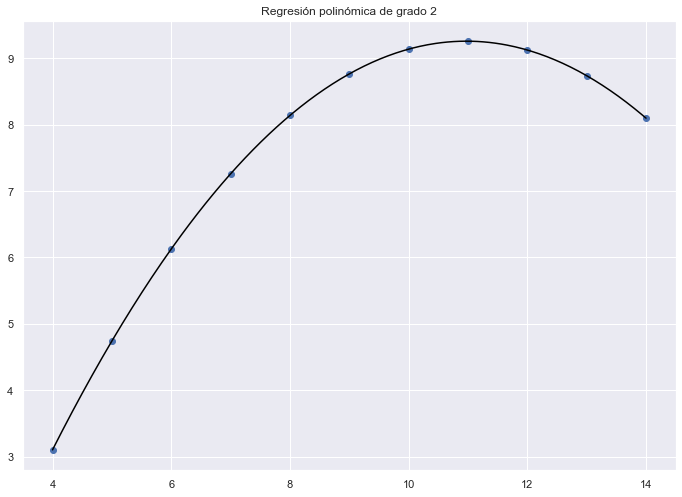

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(x2_test,y2_test)

X_seq = np.linspace(x2.min(),x2.max(),300).reshape(-1,1)

plt.figure()
plt.scatter(x2,y2)
plt.plot(X_seq,polyreg.predict(X_seq),color="black")
plt.title("Regresión polinómica de grado "+str(degree))
plt.show()


## Ejemplo de Implemetación Grupo 3

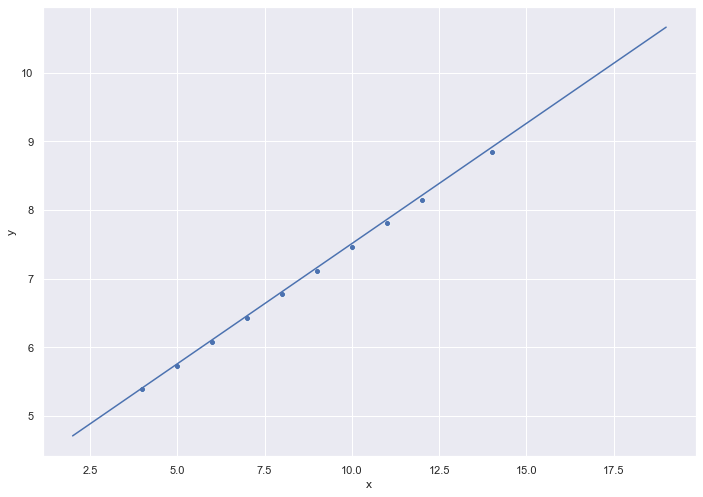

In [8]:
df_drop = df.drop(24)
model_rl3 = LinearRegression() # Creando el modelo.

grupo3 = df_drop[df_drop['grupo'] == 'Grupo_3']

x3 = grupo3[['x']]
y3 = grupo3['y']

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.33, random_state=42)

model_rl3.fit(x3_train, y3_train) 

# Lista de coeficientes B para cada X

beta_03 = round(model_rl3.intercept_,2)
beta_13 = round(model_rl3.coef_[0],2)

x1_rango = np.arange(2,20,1)
y3_rango = [beta_03 + beta_13*x for x in x1_rango]
df_plot3 = pd.DataFrame({'x':x1_rango,
                        'y': y3_rango})

sns.scatterplot(
    x='x',
    y='y',
    data=df_drop[df_drop['grupo'] == 'Grupo_3']
)
sns.lineplot(
    x='x',
    y='y',
    data=df_plot3
)
plt.show()